Data Cleaning


In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r'C:\Users\ankur\Downloads\Electric Vehicle Sales by State in India (1).csv')

In [9]:
df.head(10)
df.tail(5)
df.shape
df.dtypes


Year                 float64
Month_Name            object
Date                  object
State                 object
Vehicle_Class         object
Vehicle_Category      object
Vehicle_Type          object
EV_Sales_Quantity    float64
dtype: object

In [18]:
df.isna().sum()
df.duplicated().sum()


np.int64(0)

In [28]:
df['Date']=pd.to_datetime(df['Date'], errors='coerce')
df['Year']=df['Year'].astype(int)
df['EV_Sales_Quantity']=df['EV_Sales_Quantity'].astype(int)
df.dtypes
df.sample(5)

,Year,Month_Name,Date,State,Vehicle_Class,Vehicle_Category,Vehicle_Type,EV_Sales_Quantity
25847,2014,apr,2014-04-01,Odisha,PRIVATE SERVICE VEHICLE (INDIVIDUAL USE),Others,Others,0
26728,2015,apr,2015-04-01,Uttarakhand,CRANE MOUNTED VEHICLE,Others,Others,0
81200,2014,nov,2014-11-01,Punjab,THREE WHEELER (GOODS),3-Wheelers,3W_Goods,0
79755,2022,oct,2022-10-01,Uttarakhand,MOTOR CAR,4-Wheelers,4W_Personal,44
90068,2015,dec,2015-12-01,Rajasthan,FORK LIFT,Others,Others,0


In [30]:
categorical_columns=['Month_Name','State','Vehicle_Class','Vehicle_Category','Vehicle_Type' ]

In [35]:
df[categorical_columns]=df[categorical_columns].astype("category")
df.dtypes

Year                          int64
Month_Name                 category
Date                 datetime64[ns]
State                      category
Vehicle_Class              category
Vehicle_Category           category
Vehicle_Type               category
EV_Sales_Quantity             int64
dtype: object

In [50]:
print(df[df['EV_Sales_Quantity' ]<0])
print(df['Year'].unique())
print(df[df['Date'].isna()])


count    96845.000000
mean        37.108896
std        431.566675
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      20584.000000
Name: EV_Sales_Quantity, dtype: float64

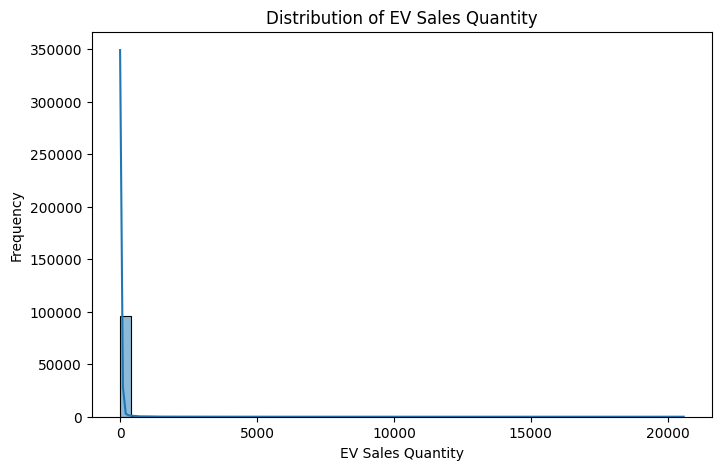

In [68]:
df['EV_Sales_Quantity'].describe()

plt.figure(figsize=(8,5))
sns.histplot(df['EV_Sales_Quantity'], bins=50 ,kde= True)
plt.title('Distribution of EV Sales Quantity')
plt.xlabel('EV Sales Quantity')
plt.ylabel('Frequency')
plt.show()

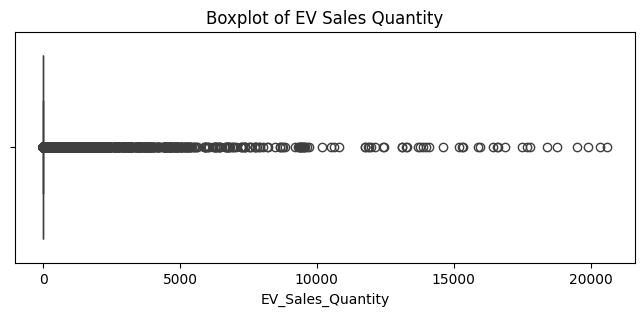

In [69]:
plt.figure(figsize=(8,3))
sns.boxplot(x=df['EV_Sales_Quantity'])
plt.title('Boxplot of EV Sales Quantity')
plt.show()



In [71]:
Yearly_Sales= df.groupby("Year")['EV_Sales_Quantity'].sum().reset_index()
Yearly_Sales


,Year,EV_Sales_Quantity
0,2014,2392
1,2015,7805
2,2016,49855
3,2017,87420
4,2018,130254
5,2019,166819
6,2020,124684
7,2021,331498
8,2022,1024723
9,2023,1525179


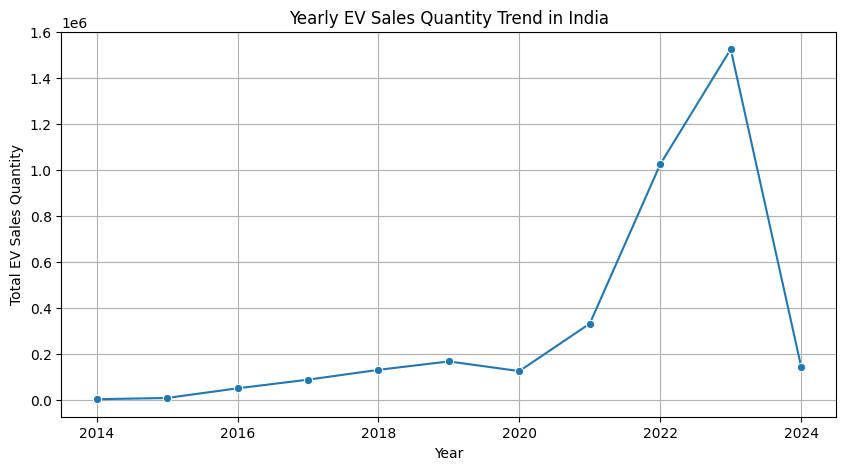

In [77]:
plt.figure(figsize=(10,5))
sns.lineplot(data=Yearly_Sales, x='Year', y='EV_Sales_Quantity', marker='o')
plt.title('Yearly EV Sales Quantity Trend in India')
plt.xlabel('Year')
plt.ylabel('Total EV Sales Quantity')
plt.grid(True)
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\4258158535.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Monthly_Sales= df. groupby("Month_Name")['EV_Sales_Quantity'].sum().reset_index()


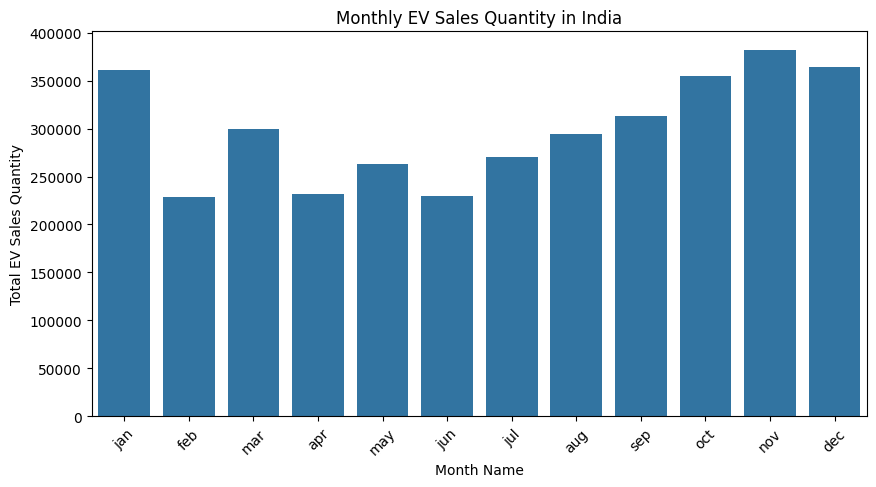

In [83]:
Monthly_Sales= df. groupby("Month_Name")['EV_Sales_Quantity'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=Monthly_Sales, x='Month_Name',y='EV_Sales_Quantity', order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Monthly EV Sales Quantity in India')
plt.xlabel('Month Name')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=45)
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\3801250693.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  State_Sales= df.groupby("State")['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)


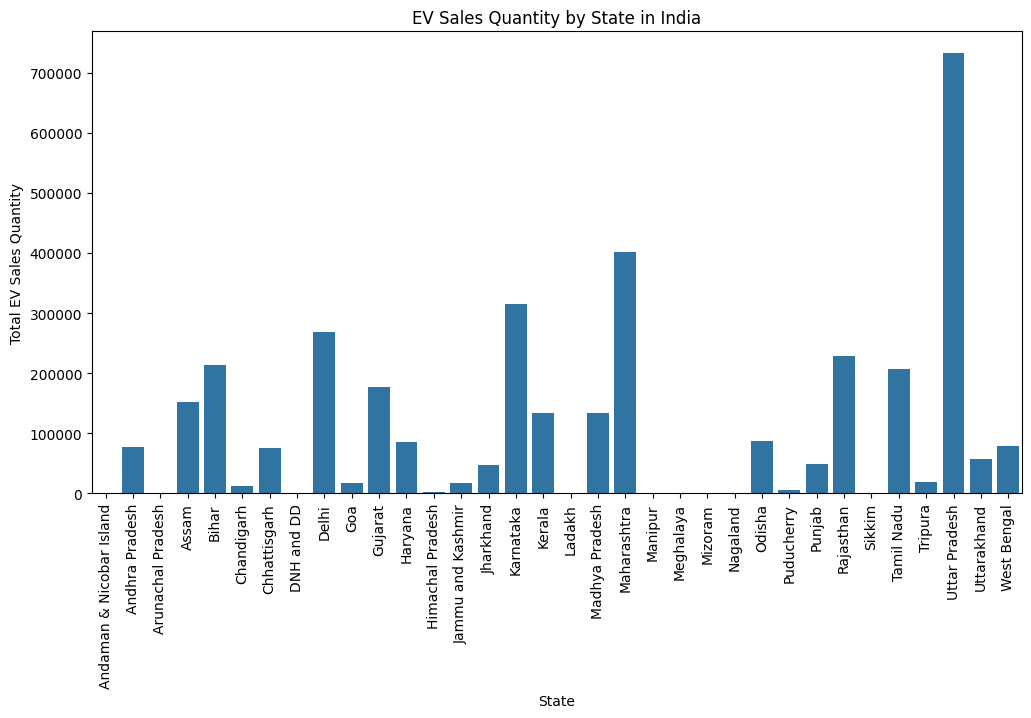

In [86]:
State_Sales= df.groupby("State")['EV_Sales_Quantity'].sum().reset_index().sort_values(by='EV_Sales_Quantity', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(data=State_Sales, x='State',y='EV_Sales_Quantity')
plt.title('EV Sales Quantity by State in India')
plt.xlabel('State')
plt.ylabel('Total EV Sales Quantity')
plt.xticks(rotation=90)
plt.show()

C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\2904140361.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_sales = df.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().reset_index()


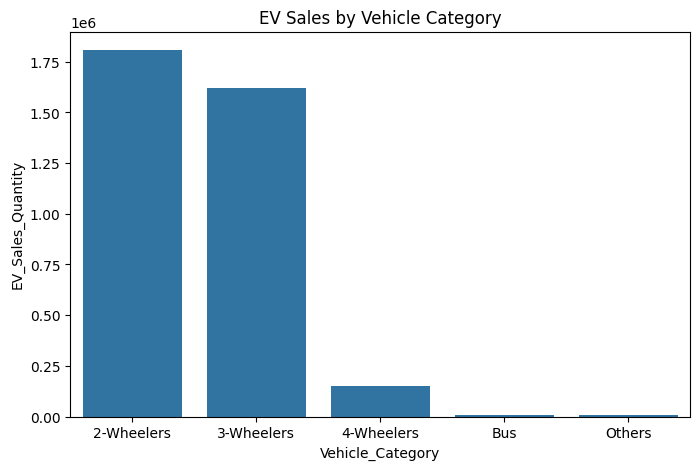

In [87]:
category_sales = df.groupby("Vehicle_Category")["EV_Sales_Quantity"].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(x="Vehicle_Category", y="EV_Sales_Quantity", data=category_sales)
plt.title("EV Sales by Vehicle Category")
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\1756569650.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_sales = df.groupby("Vehicle_Type")["EV_Sales_Quantity"].sum().reset_index()


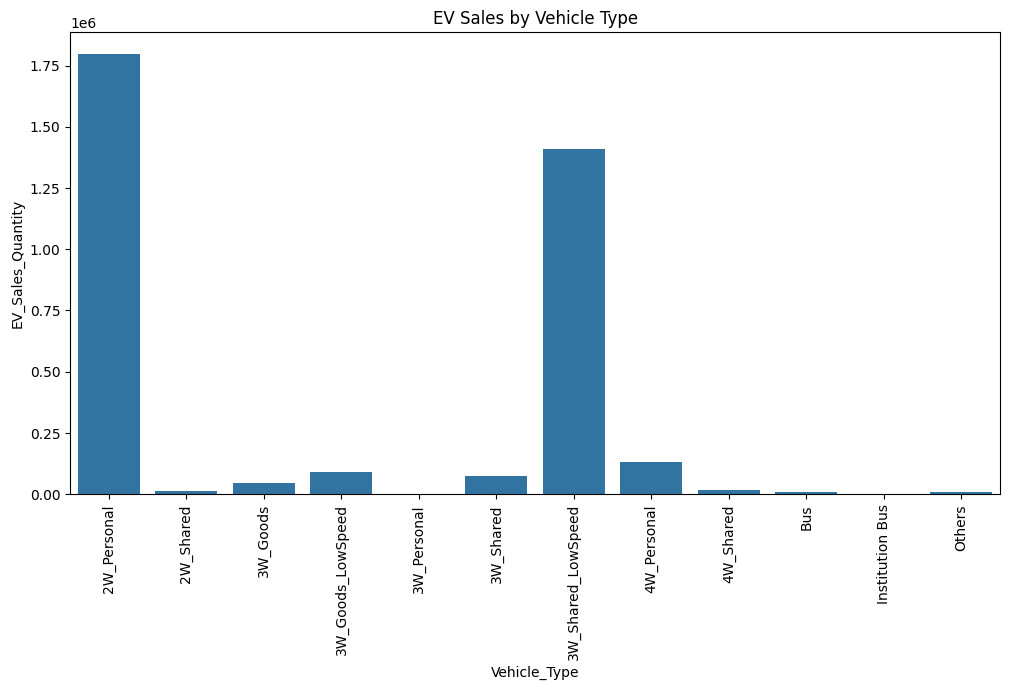

In [88]:
type_sales = df.groupby("Vehicle_Type")["EV_Sales_Quantity"].sum().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Vehicle_Type", y="EV_Sales_Quantity", data=type_sales)
plt.xticks(rotation=90)
plt.title("EV Sales by Vehicle Type")
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\3847500907.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_data = df.pivot_table(


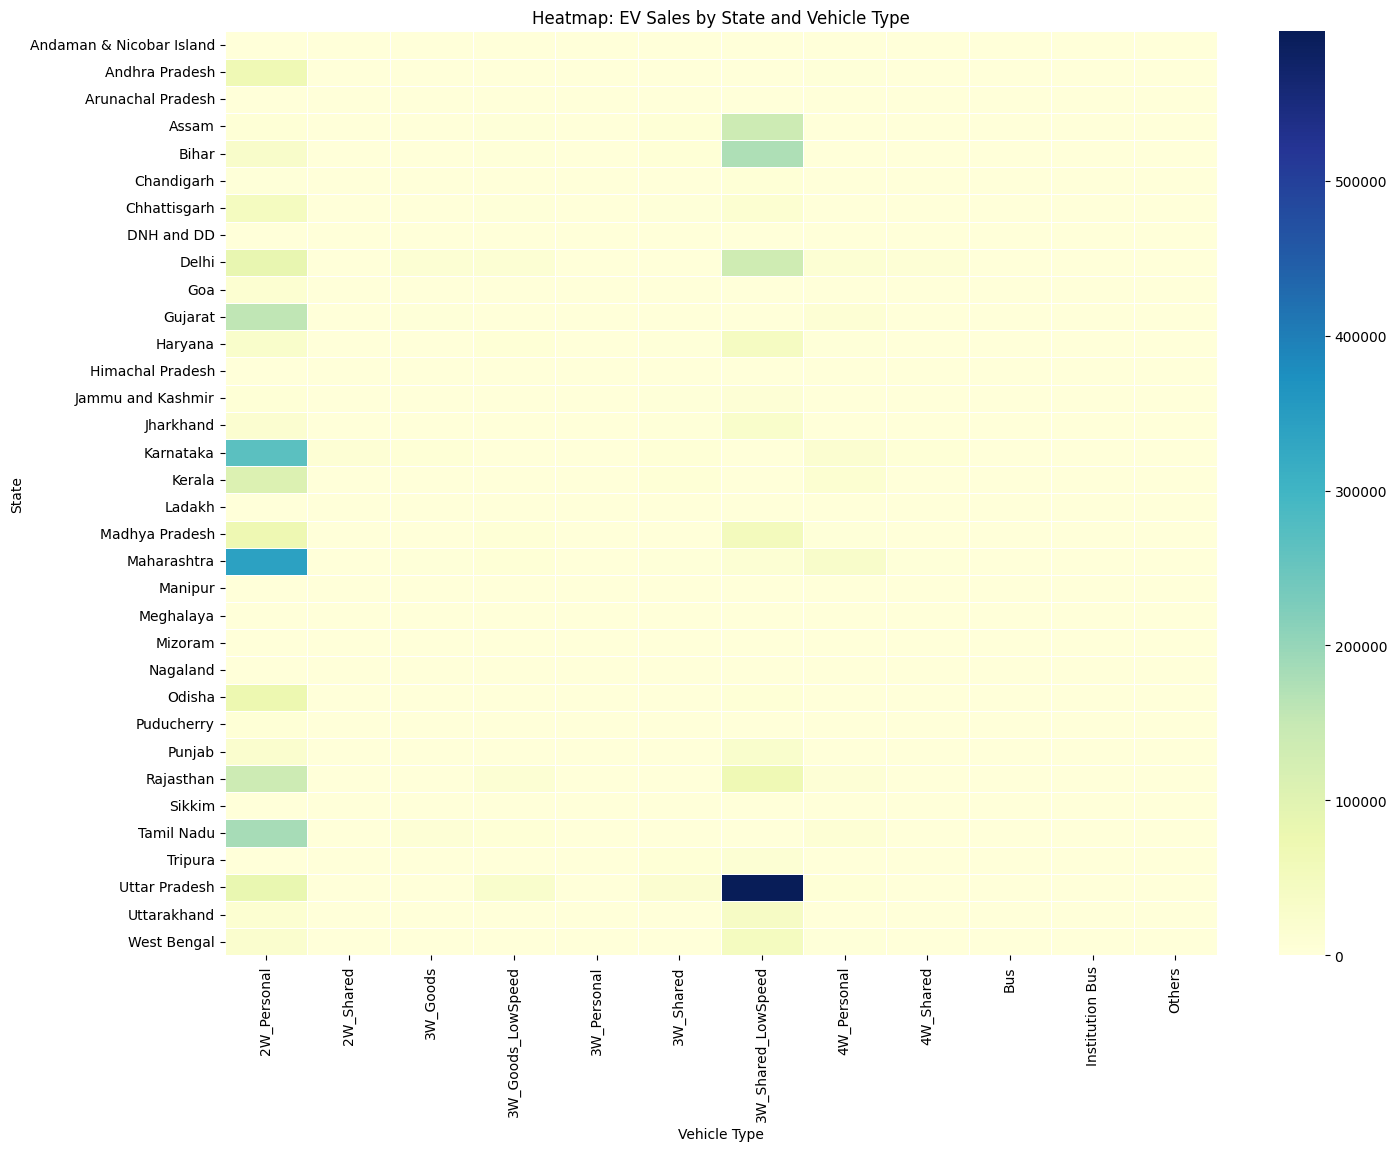

In [94]:
pivot_data = df.pivot_table(
    index="State",
    columns="Vehicle_Type",
    values="EV_Sales_Quantity",
    aggfunc="sum"
)

plt.figure(figsize=(16,12))
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=.5)
plt.title("Heatmap: EV Sales by State and Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("State")
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\1240239125.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_sales = df.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().reset_index().sort_values(by="EV_Sales_Quantity", ascending=False)


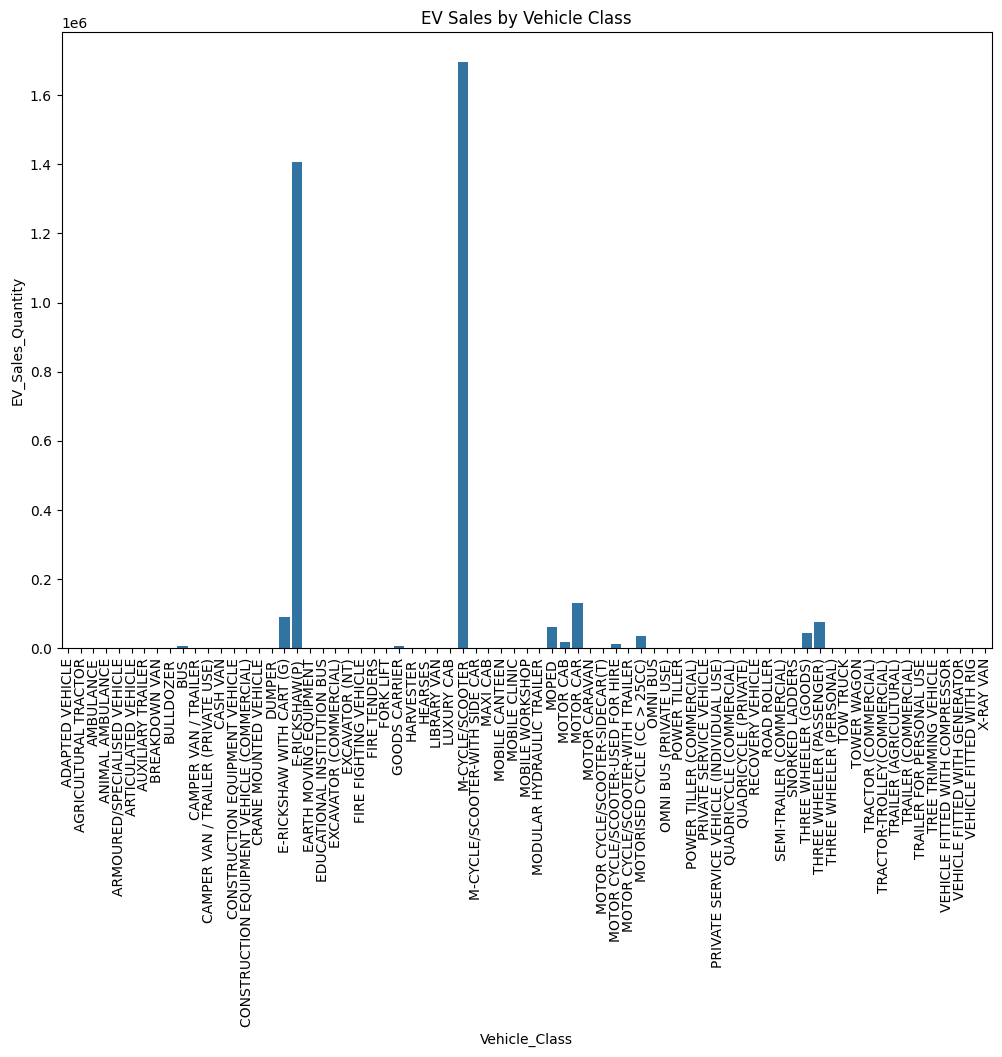

In [95]:
class_sales = df.groupby("Vehicle_Class")["EV_Sales_Quantity"].sum().reset_index().sort_values(by="EV_Sales_Quantity", ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x="Vehicle_Class", y="EV_Sales_Quantity", data=class_sales)
plt.xticks(rotation=90)
plt.title("EV Sales by Vehicle Class")
plt.show()


C:\Users\ankur\AppData\Local\Temp\ipykernel_30356\4250759960.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_vehicle_by_state = df.loc[df.groupby("State")["EV_Sales_Quantity"].idxmax()]


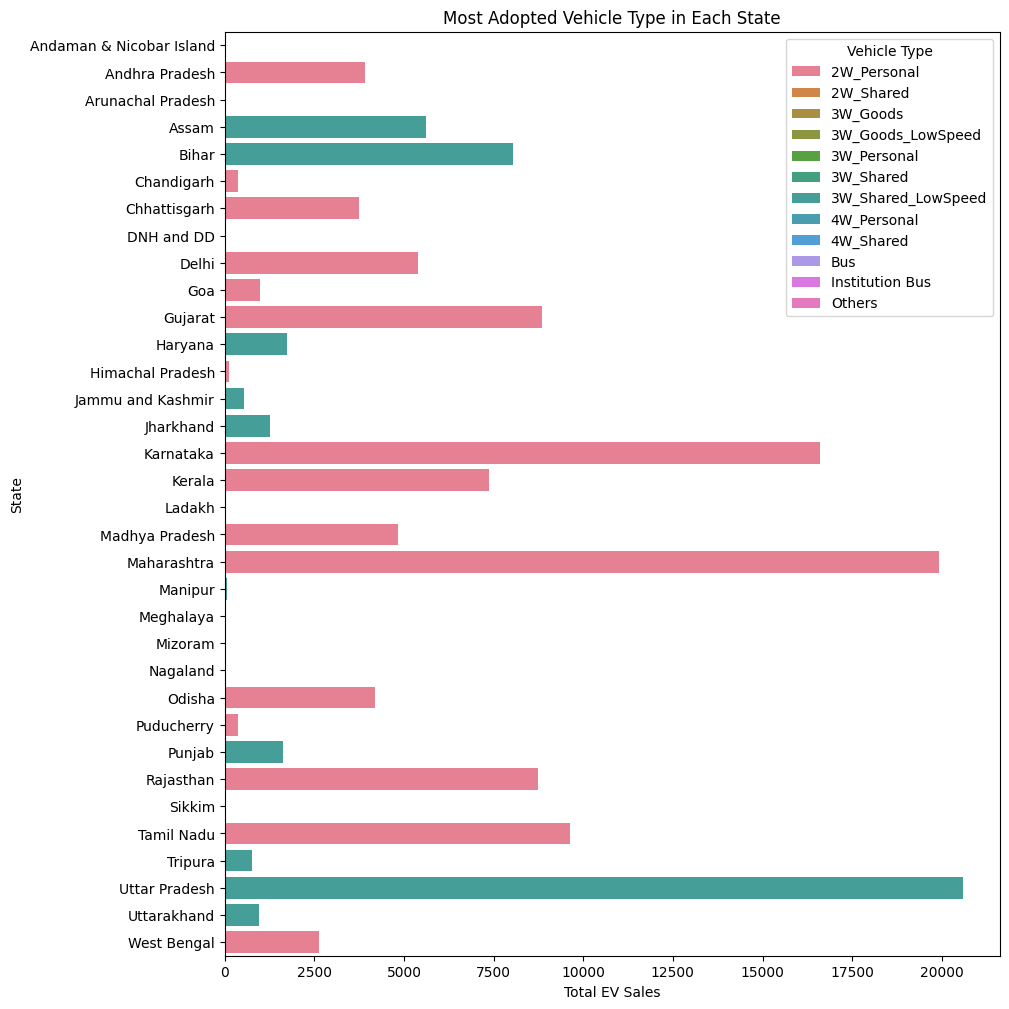

In [98]:
top_vehicle_by_state = df.loc[df.groupby("State")["EV_Sales_Quantity"].idxmax()]

plt.figure(figsize=(10,12))
sns.barplot(y="State", x="EV_Sales_Quantity", hue="Vehicle_Type", data=top_vehicle_by_state)
plt.title("Most Adopted Vehicle Type in Each State")
plt.xlabel("Total EV Sales")
plt.ylabel("State")
plt.legend(title="Vehicle Type")
plt.show()
